In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
##Generation of input data
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0,0.1], ([0.1,1.1])])

mean_02 = np.array([6.0,6.0])
cov_02 = np.array([[1.0,0.1], ([0.1,1.1])])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print dist_01.shape
print dist_02.shape

(500, 2)
(500, 2)


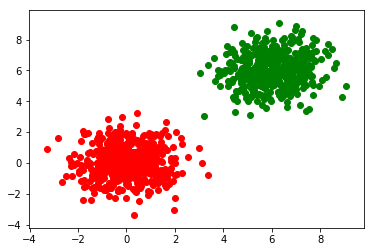

In [7]:
for ix in range(500):
    plt.scatter(dist_01[ix][0],dist_01[ix][1],c='r')
    plt.scatter(dist_02[ix][0],dist_02[ix][1],c='g')
plt.show()

In [10]:
data = np.vstack((dist_01, dist_02))
print data.shape
np.random.shuffle(data)

(1000, 2)


In [25]:
## KMeans Clustering definition
k = 4
num_iters = 5
clusters = {}
colors = ['red', 'green', 'blue', 'yellow']
for cx in range(k):
    cluster_vals = {
        'centroid': np.random.uniform(low=data.min(), high=data.max(), size=data.shape[1]) ,
        'points': [],
        'color': colors[cx],
        'history': []
    }
    clusters[cx] = cluster_vals

In [14]:
for cx in clusters:
    print cx, clusters[cx]

0 {'color': 'red', 'points': [], 'centroid': array([3.87133072, 5.15357539]), 'history': []}
1 {'color': 'green', 'points': [], 'centroid': array([-0.24929878,  3.93055403]), 'history': []}
2 {'color': 'blue', 'points': [], 'centroid': array([8.70309208, 2.56606843]), 'history': []}
3 {'color': 'yellow', 'points': [], 'centroid': array([2.45673091, 6.78635982]), 'history': []}


In [18]:
## Distance Function
def distance(p1, p2):
    return np.sqrt(((p1-p2)**2).sum())   

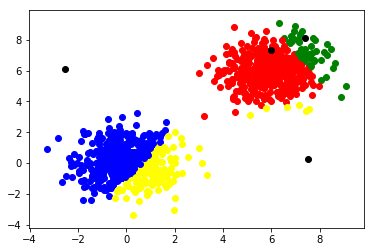

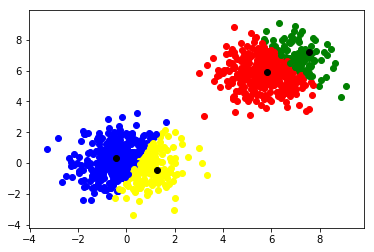

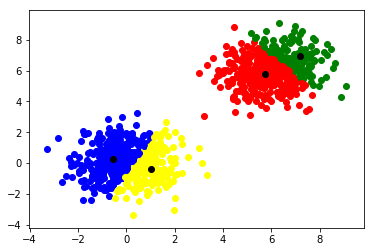

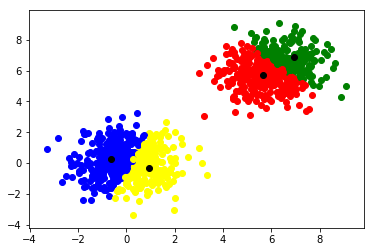

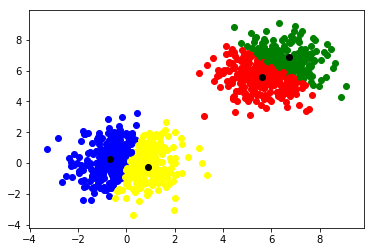

In [26]:
## KMeans Algorithm
for ix in range(num_iters):
    plt.figure(ix)
    ## Step 1 - Assign points to clusters
    for px in range(data.shape[0]):
        dist = []
        for cx in range(k):
            d = distance(data[px], clusters[cx]['centroid'])
            dist.append(d)
        dist = np.array(dist)
        cluster_id = np.argmin(dist)
        clusters[cluster_id]['points'].append(data[px])
        ## For Visualisation
        plt.scatter(data[px][0], data[px][1], c=clusters[cluster_id]['color'])
    
    ## Step 2 - Update centroid location
    for cx in range(k):
        old_centroid = clusters[cx]['centroid']
        ## For visualisation
        plt.scatter(clusters[cx]['centroid'][0], clusters[cx]['centroid'][1], c='black')
        clusters[cx]['history'].append(old_centroid)
        if len(clusters[cx]['points']) > 0:
            new_centroid = np.mean(np.array(clusters[cx]['points']),axis = 0)
            clusters[cx]['centroid'] = new_centroid
        
        ## Step 3 - Reinitalise
        clusters[cx]['points'] = []